In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open("../results/rate_constraints/adult-income/trials/results.json", 'r') as in_file:
    results = json.load(in_file)

In [4]:
def compute_score_mean(d):
    # compute mean of violations
    return np.mean(np.array(list(d.values())))

def compute_score_median(d):
    # compute mean of violations
    return np.median(np.array(list(d.values())))

def compute_score_max(d):
    # compute mean of violations
    return np.max(np.array(list(d.values())))

In [5]:
def get_scores(results, key, func):
    # model constraint satisfaction
    all_scores = []
    constraint_set = ['0', '5', '10', '15', '22']
    for num_constraints in constraint_set:
        trials = results[num_constraints]
        trial_scores = []
        for trial_num in trials.keys():
            score = func(trials[trial_num][key])
            trial_scores.append(score)
        all_scores.append(trial_scores)
        
    min_scores = []
    mean_scores = []
    max_scores = []
    baseline = 0
    for i in range(len(all_scores)):
        if i == 0:
            baseline = all_scores[0]
            continue
        min_scores.append(min(all_scores[i]))
        mean_scores.append(np.mean(all_scores[i]))
        max_scores.append(max(all_scores[i]))
    min_scores = np.array(min_scores)
    mean_scores = np.array(mean_scores)
    max_scores = np.array(max_scores)
    return min_scores, mean_scores, max_scores, baseline

In [6]:
def get_performance(results, key, func):
    # model performance (accuracy/tpr)
    all_scores = []
    constraint_set = ['0', '5', '10', '15', '22']
    for num_constraints in constraint_set:
        trials = results[num_constraints]
        trial_scores = []
        for trial_num in trials.keys():
            score = trials[trial_num]['scores'][key]
            trial_scores.append(score)
        all_scores.append(trial_scores)
    min_scores = []
    mean_scores = []
    max_scores = []
    baseline = 0
    for i in range(len(all_scores)):
        if i == 0:
            baseline = all_scores[0]
            continue
        min_scores.append(min(all_scores[i]))
        mean_scores.append(np.mean(all_scores[i]))
        max_scores.append(max(all_scores[i]))
    min_scores = np.array(min_scores)
    mean_scores = np.array(mean_scores)
    max_scores = np.array(max_scores)
    return min_scores, mean_scores, max_scores, baseline

# Result 1: Overall constraint satisfaction score 

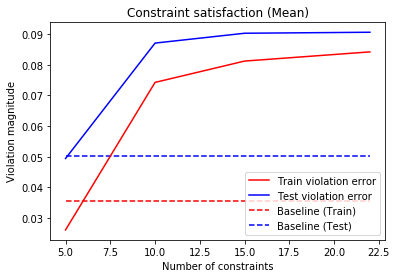

In [11]:
_, train_scores, _, train_baseline = get_scores(results, 'train_violation', compute_score_mean)
_, test_scores, _, test_baseline = get_scores(results, 'test_violation', compute_score_mean)
active_constraint_set = [5, 10, 15, 22]
plt.hlines(y=train_baseline, xmin=5, xmax=22, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(active_constraint_set, train_scores, label="Train violation error", color="red")

plt.hlines(y=test_baseline, xmin=5, xmax=22, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test violation error", color="blue")

plt.title("Constraint satisfaction (Mean)")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

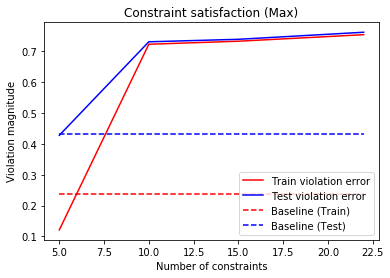

In [21]:
train_lower, train_scores, train_upper, train_baseline = get_scores(results, 'train_violation', compute_score_max)
test_lower, test_scores, test_upper, test_baseline = get_scores(results, 'test_violation', compute_score_max)
active_constraint_set = [5, 10, 15, 22]
plt.hlines(y=train_baseline, xmin=5, xmax=22, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(active_constraint_set, train_scores, label="Train violation error", color="red")
#plt.fill_between(active_constraint_set, train_upper, train_lower, alpha=0.25, color="red")

plt.hlines(y=test_baseline, xmin=5, xmax=22, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test violation error", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("Constraint satisfaction (Max)")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

In [23]:
results['10']

{'0': {'active_constraints': ['age_3.0',
   'marital_status_Married-spouse-absent',
   'marital_status_Married-civ-spouse',
   'race_Other',
   'age_0.0',
   'age_1.0',
   'race_Amer-Indian-Eskimo',
   'marital_status_Divorced',
   'gender_Female',
   'education_num_1'],
  'scores': {'accuracy': 0.8165960321847552, 'tpr': 0.31929277171086845},
  'test_violation': {'age_0.0': 0.034800795540593524,
   'age_1.0': 0.011857388033540486,
   'age_2.0': 0.04843298079749277,
   'age_3.0': 0.08284260298695591,
   'education_num_0': 0,
   'education_num_1': 0.0652482910910639,
   'education_num_2': 0,
   'education_num_3': 0.08136288637558127,
   'gender_Female': 0.10528349947557221,
   'gender_Male': 0.03998241256431585,
   'marital_status_Divorced': 0.06724568982759312,
   'marital_status_Married-AF-spouse': 0.7307072282891316,
   'marital_status_Married-civ-spouse': 0.046624603744781626,
   'marital_status_Married-spouse-absent': 0.14737389495579822,
   'marital_status_Never-married': 0.044756

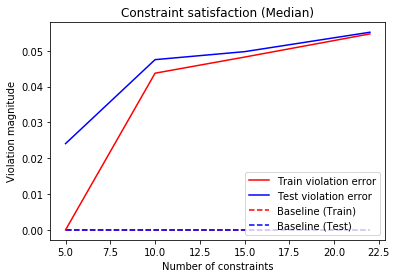

In [18]:
train_lower, train_scores, train_upper, train_baseline = get_scores(results, 'train_violation', compute_score_median)
test_lower, test_scores, test_upper, test_baseline = get_scores(results, 'test_violation', compute_score_median)
active_constraint_set = [5, 10, 15, 22]
plt.hlines(y=train_baseline, xmin=5, xmax=22, label="Baseline (Train)", color="red", linestyle='dashed')
plt.plot(active_constraint_set, train_scores, label="Train violation error", color="red")
#plt.fill_between(active_constraint_set, train_upper, train_lower, alpha=0.25, color="red")

plt.hlines(y=test_baseline, xmin=5, xmax=22, label="Baseline (Test)", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test violation error", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("Constraint satisfaction (Median)")
plt.ylabel("Violation magnitude")
plt.xlabel("Number of constraints")
plt.legend()
plt.show()

## Accuracy 

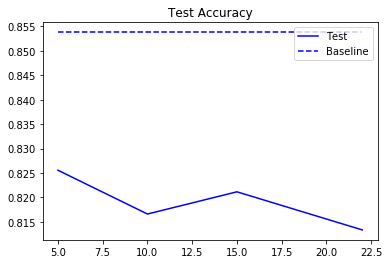

In [14]:
test_lower, test_scores, test_upper, test_baseline = get_performance(results, 'accuracy', None)
active_constraint_set = [5, 10, 15, 22]

plt.hlines(y=test_baseline, xmin=5, xmax=22, label="Baseline", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("Test Accuracy")
plt.legend()
plt.show()

## TPR

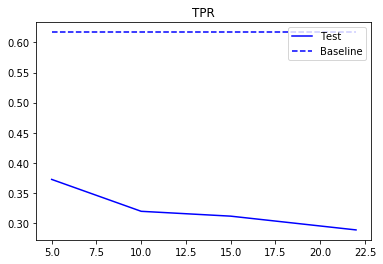

In [15]:
test_lower, test_scores, test_upper, test_baseline = get_performance(results, 'tpr', None)
active_constraint_set = [5, 10, 15, 22]

plt.hlines(y=test_baseline, xmin=5, xmax=22, label="Baseline", color="blue", linestyle='dashed')
plt.plot(active_constraint_set, test_scores, label="Test", color="blue")
#plt.fill_between(active_constraint_set, test_upper, test_lower, alpha=0.25, color="blue")

plt.title("TPR")
plt.legend()
plt.show()